# TP SVM Télécom ParisTech

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

/home/raphael/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Question 1

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2] # Train dataset, we use only 2 features for now
y = y[y != 0] # Train prediction variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print(X_train.shape,y_train.shape)

(50, 2) (50,)


In [4]:
clf = SVC(kernel = 'linear')
print(X_train.shape, y_train.shape)
clf.fit(X_train, y_train)
print("noyau linéaire, précision :", clf.score(X_test, y_test))
scores = cross_val_score(clf,X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(50, 2) (50,)
noyau linéaire, précision : 0.66
Accuracy: 0.72 (+/- 0.16)


## Question 2

In [5]:
clf = SVC(kernel="poly", degree=3)
clf.fit(X_train, y_train)
print("noyau polynomial, précision :", clf.score(X_test, y_test))
scores = cross_val_score(clf,X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

noyau polynomial, précision : 0.7
Accuracy: 0.72 (+/- 0.16)


## Question 3

La deuxième contrainte de l'équation (2) peut se réécrire
$$ \xi_i \geq 1-y_i(\langle w,\Phi(x_i) \rangle + \omega_0) \;\; \forall i$$

Par ailleurs la plus petite valeure de $\xi_i$ est $0$ (première contrainte de (2)), ce qui correspond au fait que le point $i$ soit du bon côté de sa marge. On peut alors écrire:

$$  \xi_i \geq \left[1-y_i(\langle w,\Phi(x_i) \rangle + \omega_0)\right]_+ \geq 0 \;\; \forall i$$

Cette nouvelle contrainte inclus les deux contraintes initiales de l'équation (2).

$\xi_i$ étant le coût d'une mauvaise classification, on peut remplacer $\xi_i$ par $\left[1-y_i(\langle w,\Phi(x_i) \rangle + \omega_0)\right]_+$ dans l'expression à minimiser. Le coût d'une mauvaise classification est alors inférieur au coût $\xi_i$, mais les contraintes qui apparaissaient dans l'expression initiale du problème primal disparaissent (elles sont inclues dans la fonction Hinge).  



## Question 4

L'erreur de classification qui vaut 1 ou 0 est constituée de deux plateaux, il est donc compliqué de chercher à minimiser directement cette fonction puisque son gradient est nul partout et qu'elle possède une discontinuité. La fonction Hinge est bien un majorant de l'erreur de classification (voir figure ci-dessous). Et cette fonction est convexe, ce qui permet de la minimiser avec une des méthodes utilisant le gradient.

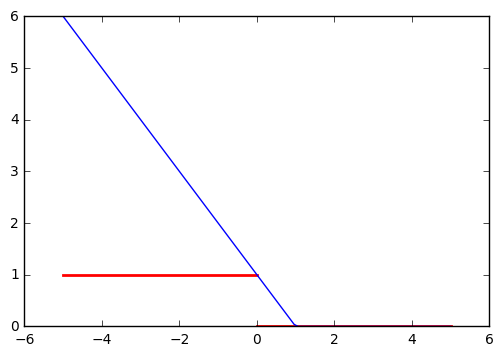

In [6]:
x = np.linspace(-5, 5, 100)
x_m = np.linspace(-5, 0, 5)
x_p = np.linspace(0, 5, 5)
hinge = [max(0, 1-i) for i in x]
plt.plot(x_m, np.ones(5), 'r', lw=2)
plt.plot(x_p, np.zeros(5), 'r', lw=2, label='classif error')
plt.plot(x, hinge, label='hinge loss')
plt.show()

## Question 5

In [7]:
from time import time
import pylab as pl
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=True, funneled=False, slice_=None,
                              download_if_missing=True)

In [8]:
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape
print(n_samples,h ,w,n_colors)

1288 100 100 3


In [9]:
target_names = lfw_people.target_names.tolist()
names = ['Tony Blair', 'Colin Powell']
idx0 = (lfw_people.target == target_names.index(names[0])) # First target Tony Blair
idx1 = (lfw_people.target == target_names.index(names[1])) # Second target Colin Powell
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

In [10]:
# Generation of the traint and test datasets.
X = images.copy().reshape(n_samples, -1)
# Standardization
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)
indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] / 2], indices[X.shape[0] / 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]

In [11]:
C = np.logspace(-5, 5, 30)
scores = []
for c in C :
    clf = SVC(kernel='linear', C=c).fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))

In [12]:
for i,score in enumerate(scores):
    print("C coeff: % .5f" % C[i], "Score : %.5f" % score)

C coeff:  0.00001 Score : 0.70526
C coeff:  0.00002 Score : 0.85263
C coeff:  0.00005 Score : 0.89474
C coeff:  0.00011 Score : 0.91579
C coeff:  0.00024 Score : 0.92632
C coeff:  0.00053 Score : 0.92632
C coeff:  0.00117 Score : 0.92632
C coeff:  0.00259 Score : 0.92632
C coeff:  0.00574 Score : 0.92632
C coeff:  0.01269 Score : 0.92632
C coeff:  0.02807 Score : 0.92632
C coeff:  0.06210 Score : 0.92632
C coeff:  0.13738 Score : 0.92632
C coeff:  0.30392 Score : 0.92632
C coeff:  0.67234 Score : 0.92632
C coeff:  1.48735 Score : 0.92632
C coeff:  3.29034 Score : 0.92632
C coeff:  7.27895 Score : 0.92632
C coeff:  16.10262 Score : 0.92632
C coeff:  35.62248 Score : 0.92632
C coeff:  78.80463 Score : 0.92632
C coeff:  174.33288 Score : 0.92632
C coeff:  385.66204 Score : 0.92632
C coeff:  853.16785 Score : 0.92632
C coeff:  1887.39182 Score : 0.92632
C coeff:  4175.31894 Score : 0.92632
C coeff:  9236.70857 Score : 0.92632
C coeff:  20433.59718 Score : 0.92632
C coeff:  45203.53656 Scor

Max score :  0.92632 Best coeff : 100000.00000


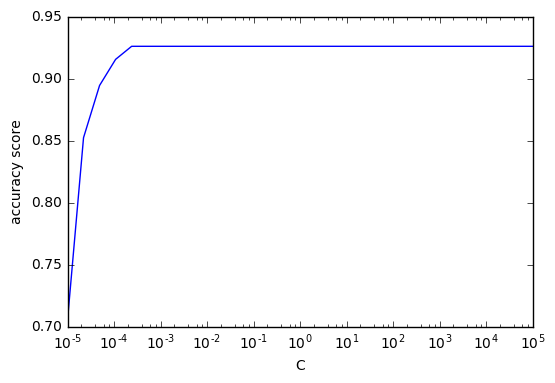

In [13]:
sorted_c = np.argsort(scores)
print("Max score : % .5f" % max(scores), "Best coeff : %.5f" % C[sorted_c[-1]])
plt.figure()
plt.semilogx(C, scores)
plt.xlabel('C')
plt.ylabel('accuracy score')
plt.show()

## Question 6

In [14]:
def noise_generator(array, ncols=3):
    a = np.random.rand(len(array),ncols)*4. -2. 
    array = np.append(array, a, axis=1)
    return array


In [15]:
# Checking the perf degradation when adding noise
X_train_with_noise = X_train
X_test_with_noise = X_test

scores = []
for s in range(51):
    X_train_with_noise = noise_generator(X_train,s*1000)
    X_test_with_noise = noise_generator(X_test,s*1000)
    clf = SVC(kernel='linear', C=10e-3).fit(X_train_with_noise, y_train)
    scores.append(clf.score(X_test_with_noise, y_test))

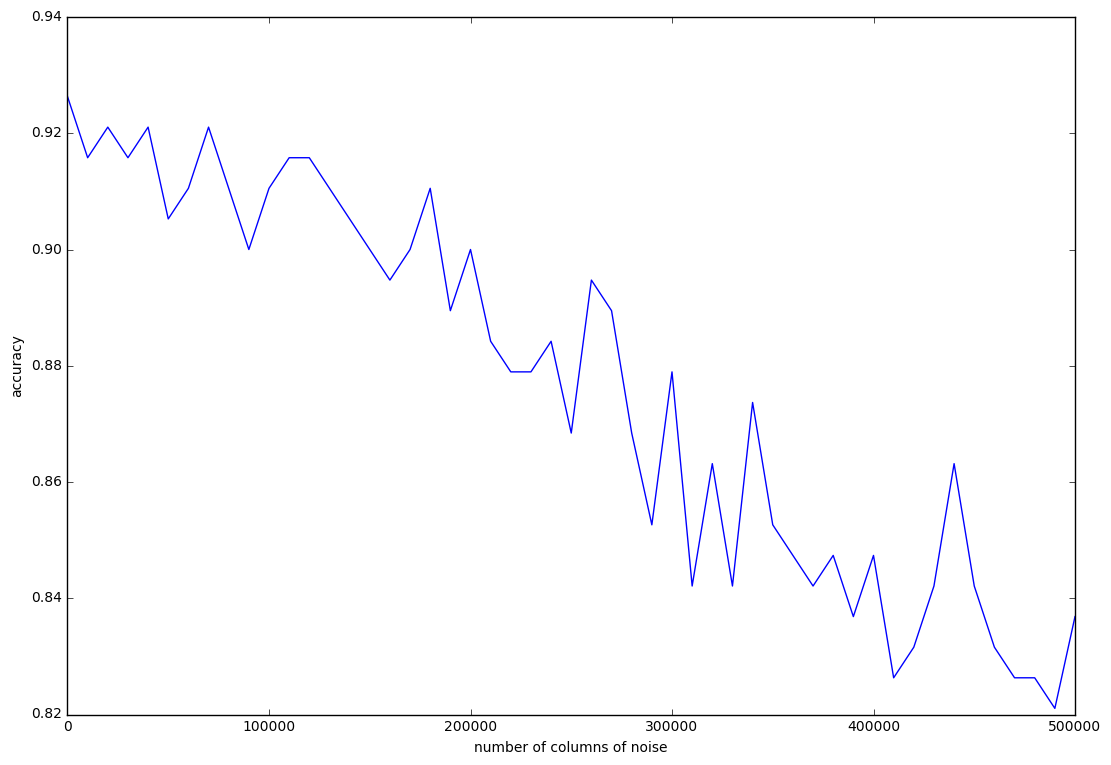

In [16]:
col_number = np.multiply(range(51),10000)
plt.figure(figsize=(13,9))
plt.plot(col_number, scores)
plt.xlabel("number of columns of noise")
plt.ylabel('accuracy')
plt.show()

## Question 8

Max score :  0.87368 Best coeff : 100000.00000


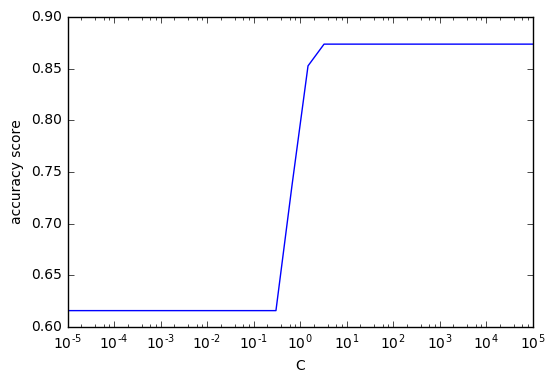

In [18]:
scores = []
for c in C :
    clf = SVC(kernel='rbf',C=c).fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
sorted_c = np.argsort(scores)
print("Max score : % .5f" % max(scores), "Best coeff : %.5f" % C[sorted_c[-1]])
plt.figure()
plt.semilogx(C, scores)
plt.xlabel('C')
plt.ylabel('accuracy score')
plt.show()    


In [28]:
from sklearn.decomposition import PCA
PCA = PCA(svd_solver='randomized')
PCA.fit(X_train)
expvar_cumsum = PCA.explained_variance_ratio_.cumsum()
threshold = expvar_cumsum[expvar_cumsum >= 0.95][0] 
n_var = np.argwhere(expvar_cumsum == threshold)[0][0]

MemoryError: 